In [8]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

In [9]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]

## Calculate mean value of each satellite track 

In [10]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [11]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

1.3633999824523926 1985-04-05 21:27:30.469790
1.3511250019073486 1985-04-14 09:26:31.513184
1.34530770778656 1985-05-07 11:06:14.088943
2.0326924324035645 1985-05-30 12:45:54.566106
1.6260000467300415 1985-06-02 12:54:42.804684
0.9227856993675232 1985-06-25 14:34:14.719868
1.345666766166687 1985-08-10 17:53:29.313367
2.313499927520752 1985-09-02 19:32:58.781247
2.4012999534606934 1985-09-05 19:41:45.054690
1.3407059907913208 1985-09-28 21:21:12.227023
0.32442858815193176 1985-10-16 11:10:26.379465
1.9190832376480105 1985-11-08 12:49:40.654948
1.4140626192092896 1985-11-14 00:39:52.969910
1.2756000757217407 1985-12-07 02:18:58.426560
0.5147500038146973 1986-01-19 17:56:10.249999
0.3118000030517578 1986-02-11 19:35:15.709374
0.5635000467300415 1986-03-12 09:03:50.362630
2.66937518119812 1986-04-04 10:42:45.532226
1.7990001440048218 1986-04-07 10:51:29.847656
0.3752500414848328 1986-04-27 12:21:35.900392
1.867833495140076 1986-04-30 12:30:16.296876
2.049000024795532 1986-05-20 14:00:18.82

1.534923076629639 2002-09-03 17:02:47.824519
2.471400022506714 2002-09-13 12:26:37.678126
2.471071481704712 2002-09-15 06:28:32.371931
1.1715333461761477 2002-09-19 00:11:09.790903
0.6820000410079956 2002-09-20 18:15:36.070312
2.5371668338775635 2002-10-02 07:41:18.779297
1.5805714130401611 2002-10-05 00:08:20.484546
1.9125002622604368 2002-10-07 19:28:23.895834
0.9580000042915344 2002-10-18 12:26:39.204590
1.2019333839416504 2002-10-19 08:54:11.484375
0.6883529424667358 2002-10-24 00:39:35.829073
1.8616667985916135 2002-11-05 10:07:02.338542
2.64821457862854 2002-11-09 00:08:18.644496
1.81085741519928 2002-11-10 21:54:02.156251
2.217785596847534 2002-11-22 11:19:48.707031
1.0749375820159912 2002-11-27 23:06:51.950197
0.9002000093460083 2002-11-28 00:11:09.711199
0.7847143411636353 2002-12-09 12:32:35.045201
0.7667143940925598 2002-12-14 00:08:16.022470
0.8250769972801208 2002-12-15 00:19:36.021249
0.6648333668708801 2002-12-26 13:45:20.996094
0.7836000323295593 2002-12-27 12:26:37.242

2.6873334248860683 2011-06-28 10:09:59.638455
3.727889060974121 2011-07-01 00:16:38.307793
2.272666931152344 2011-07-04 12:30:58.677082
1.6195834477742512 2011-07-06 04:45:45.809244
2.208111233181424 2011-07-11 14:50:23.381946
2.5324668884277344 2011-07-12 00:13:30.636093
2.5356923616849456 2011-07-15 21:16:29.971154
2.5052499771118164 2011-07-16 02:44:17.386067
2.6478825737448304 2011-07-17 21:14:01.124081
2.2807003021240235 2011-07-20 15:08:52.919140
1.3472222222222223 2011-07-21 12:48:54.796876
1.412500169542101 2011-07-25 08:47:17.404080
1.869083404541016 2011-07-26 00:42:47.959593
2.4164376258850098 2011-07-27 08:44:51.035156
3.3780002593994136 2011-07-31 00:17:03.783899
2.8175337314605717 2011-08-03 12:31:23.812501
2.800750096638997 2011-08-04 22:41:19.518230
0.7878889507717557 2011-08-10 08:45:56.556250
0.472599983215332 2011-08-11 00:13:52.476953
1.4387222925821943 2011-08-13 19:51:25.780382
1.7817500432332356 2011-08-14 20:39:49.954425
1.8957647435805376 2011-08-15 19:48:58.92

1.187999963760376 2017-02-15 21:45:07.787684
0.5868000030517578 2017-02-16 17:42:07.834375
0.2543636452067982 2017-02-17 16:04:09.564583
2.579125165939331 2017-02-21 03:42:24.798828
0.4741111331515842 2017-02-22 03:46:45.075087
0.4467857224600656 2017-02-23 03:39:55.918837
0.6689411997795105 2017-02-24 00:10:11
0.8701765397015739 2017-02-25 03:37:29.292510
1.2001667022705078 2017-02-26 15:40:38.662762
0.928300094604492 2017-03-04 01:45:16.895996
0.9905832608540852 2017-03-08 13:39:10.410158
0.8608823418617249 2017-03-12 12:25:04
0.7862999916076661 2017-03-14 10:31:11.315627
1.3065294377944048 2017-03-16 14:41:31.170140
0.2492727366360751 2017-03-18 11:37:42.627841
1.6983751058578491 2017-03-22 02:17:21.695543
0.5611765384674072 2017-03-23 00:10:12
0.5774706111234778 2017-03-24 02:14:55.021715
1.38172739202326 2017-03-28 09:36:12.921876
2.164000291090745 2017-04-04 04:52:46.903846
2.4125003814697266 2017-04-07 07:34:45.512695
3.037588357925415 2017-04-08 12:25:08
1.5498236487893498 2017

## Make list for each month

In [12]:
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sep = []
octo = []
nov = []
dec = []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        jan.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 2:
        feb.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 3:
        mar.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 4:
        apr.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 5:
        may.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 6:
        jun.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 7:
        jul.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 8:
        aug.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 9:
        sep.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 10:
        octo.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 11:
        nov.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 12:
        dec.append(np.mean(wh[days[k]:days[k+1]]))

In [13]:
print len(jan)
jan

216


[0.5147500038146973,
 1.1555625200271606,
 0.6211667060852051,
 0.7800000309944153,
 1.684000015258789,
 1.5885000228881836,
 1.8348184065385296,
 1.5182223849826388,
 0.8036667505900065,
 0.7566667132907443,
 0.4638000011444092,
 0.9252500534057616,
 0.7897272976962003,
 1.9138751029968264,
 1.221454620361328,
 1.0968182303688745,
 1.1670000288221571,
 2.1160833040873213,
 0.4873332977294922,
 0.9471666812896729,
 1.0030000474717882,
 0.7382968230680986,
 1.1891250610351562,
 1.2595455863259055,
 1.2140000661214192,
 1.082437515258789,
 0.7898182435469194,
 0.6396666632758247,
 1.4276666641235352,
 2.0266362970525567,
 1.1435555352105036,
 1.8346667819552949,
 1.2474446296691897,
 2.177500009536743,
 1.904882311820984,
 1.3174545981667258,
 1.1318889194064672,
 1.9238641262054443,
 1.5604001045227052,
 1.1787647008895874,
 1.3210000991821291,
 2.2470002607865767,
 0.6510587930679321,
 0.9093333350287544,
 0.7383334040641785,
 1.6520668029785155,
 1.7115834554036458,
 1.723083376884460

In [14]:
overall = [
np.mean(jan),
np.mean(feb),
np.mean(mar),
np.mean(apr),
np.mean(may),
np.mean(jun),
np.mean(jul),
np.mean(aug),
np.mean(sep),
np.mean(octo),
np.mean(nov),
np.mean(dec)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(jan),
np.std(feb),
np.std(mar),
np.std(apr),
np.std(may),
np.std(jun),
np.std(jul),
np.std(aug),
np.std(sep),
np.std(octo),
np.std(nov),
np.std(dec)]

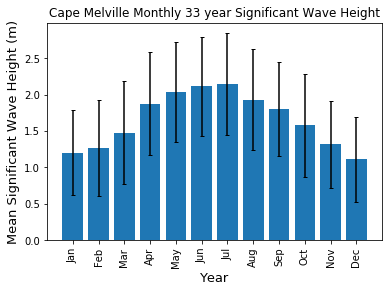

In [16]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Cape Melville Monthly 33 year Significant Wave Height')
plt.savefig('Cape Melville Monthly 33 year Significant Wave Height')
plt.show()

In [17]:
print 'Jan', np.mean(jan)
print 'Feb', np.mean(feb)
print 'Mar', np.mean(mar)
print 'Apr', np.mean(apr)
print 'May', np.mean(may)
print 'Jun', np.mean(jun)
print 'Jul', np.mean(jul)
print 'Aug', np.mean(aug)
print 'Sep', np.mean(sep)
print 'Oct', np.mean(octo)
print 'Nov', np.mean(nov)
print 'Dec', np.mean(dec)

Jan 1.2035614454404504
Feb 1.2691110102274523
Mar 1.4753063086901095
Apr 1.8769801700900823
May 2.037965515212077
Jun 2.112912731442951
Jul 2.145276886377517
Aug 1.930689634036673
Sep 1.8004938503995795
Oct 1.5769233080178968
Nov 1.3186624794018549
Dec 1.1127034556267628
